<a href="https://colab.research.google.com/github/vedangi2610/FHE-project-/blob/master/interest_vector/test/tweetpreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vedangi2610/FHE-project-/blob/master/tweetpreprocess.ipynb)

In [2]:
# !python -m spacy download en_core_web_lg
import pandas as pd
import spacy
from spacy.tokenizer import Tokenizer

In [3]:
# removing stopwords, digits, punctuations using NLTK (will also be used later to tokenize tweets)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nlp = spacy.load('en_core_web_lg')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

In [6]:
def preprocess_tweets(t, tweet_df):

  #adding a new column for cleaned tweets
  tweet_df.insert(4, "cleaned_tweets", tweet_df['text'], True)
  

  # changing to lower case 
  tweet_df['cleaned_tweets'] = tweet_df.cleaned_tweets.str.lower()
  

  # removing url links
  import re #(regex library for regular expressions)

  # for urls with http or https
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

  #for urls with or without www
  tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

  # remove @mention
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'@mention', '', x))
  

  # removing html tags that get embedded in tweets during extraction
  tweet_df.cleaned_tweets= tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

  # removing digits
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.astype(str).str.replace('\d+', '')

  # remove all remaining characters that aren't letters, white space, or 
  # the following #:)(/\='] that are used in emojis or hashtags
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
  
  
  # removing stopwords, digits, punctuations using NLTK (will also be used later to tokenize tweets)
  # remove stopwords
  additional_words  = ['rt','rts','retweet'] #other words to remove
  stop_words = set().union(stopwords.words('english'), additional_words)
  tweet_df['cleaned_tweets'] = tweet_df['cleaned_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

  #Tokenization
  tokenizer = Tokenizer(nlp.vocab)
  tokens = []

  for doc in tokenizer.pipe(tweet_df['cleaned_tweets'], batch_size = 500):
    doc_tokens = []
    for token in doc:
        if token not in stop_words:
          doc_tokens.append(token)
    tokens.append(doc_tokens)

  tweet_df['tokens'] = tokens
  

  #Lemmatization
  lemmas = []

  for text in tweet_df['cleaned_tweets']:
    doc = nlp(text)
    doc_lemmas = []
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
          doc_lemmas.append(token.lemma_)
    lemmas.append(doc_lemmas)
  tweet_df['lemmas'] = lemmas
  

  # viewing the tweets and the cleaned tweets
  tweet_df[['text', 'cleaned_tweets']]
  tweet_df.to_csv("preprocessed_user/preprocess_"+t+'.csv')

In [7]:
topics = ['pilitobar87',  'EwallWice',  'KamenIntheLoop', 'terryshumaker', 'Wake_Up_Mitron', 'amitabhnews18', 'nistula', 'katiewadington', 'stephaniekotuby', 'Nidhi', 'stew_boss', 'DougAndres', 'NMalliotakis', 'SandhuKanwar', 'ShekharGupta', 'mipalkar', 'taran_adarsh', 'PiyaSRoy', 'trilbyberesford', 'collinDcunha', 'vineetkumar_s', 'KimikoGlenn', 'annasmithjourno', 'SteveBPrice', 'sudhirsrinivasn', 'nimishhalkar', 'SPICinemas', 'jrapepper', 'pudiharicharan', 'sheilakathleen', 'katiewalshstx', 'mspecter', 'ShamikaRavi', 'engineers_feed', 'wonderofscience', 'DrSidMukherjee', 'anildash', 'thegautamkamath', 'yisongyue', 'beenwrekt', 'CoreyJPeltier', 'randi_c1', 'triketora', 'Atul_Gawande', 'reckless', 'RiyueSunnyBao', 'betenoire1', 'MicrobiomDigest', 'marshsutherland', 'dvasishtha', 'warikoo', 'malpani', 'MoodyKhedr', 'KarinaCBell', 'e2org', 'MacConwell', 'alexdtang', 'Jai__Malik', 'jasonlk', 'mattturck', 'MrAllenMiller', 'oakhcft', 'zabackj', 'EghosaO', 'andi_staub','buissonnierem', 'DocVatsa', 'GidMK', 'GorwayGlobal', 'ZoeMcLaren', 'DiseaseEcology', 'DrMaurieMarkman', 'jlkowalik', 'Neuro_Skeptic', 'eatright','DoctorLFC', 'JasonRobertsRD', 'MartinKulldorff', 'BornFitness', 'paigebueckers1', 'BeardAndBoujeee', 'mikeyfish1982', 'adamboultwood', 'edgbaston__149', 'Devanayagam', 'ToastedChels', 'abbstace', 'WtephenWurrySZN', 'sign_up1029', 'YeshwantChitte', 'TennisPuneet', 'jimmy9toes', 'TonyWurtzSK', 'malavshroff', 'gathogo_kennedy', 'rakeshrussell52', 'JMullinsGrissom', 'revathii95', 'RuhiTewari' , 'viewfinderfc' , 'FHF_Official' , 'lisaschwarzbaum', 'zlatko_minev', 'tanyabasu', 'astrocaits', 'garyvee' , 'mcuban', 'philipvandusen', 'michaelmina_lab', 'cmyeaton', 'ashishkjha'
,'ChrisHammer180', 'Richard_Mann11', 'nassercricket']
# len(users)

In [8]:
#collecting data
# topics = ["Entertainment.csv","Entrepreneurship.csv","Healthcare.csv","Politics.csv","ScienceandTech.csv","Sports.csv"]

for t in topics:
  url = 'https://raw.githubusercontent.com/vedangi2610/FHE-project-/master/data_collection/user_data_files/'+t+'.csv'
  tweet_df = pd.read_csv(url)
  preprocess_tweets(t, tweet_df)

In [ ]:
from google import files
userfile =['pilitobar87',  'EwallWice',  'KamenIntheLoop', 'terryshumaker', 'Wake_Up_Mitron', 'amitabhnews18', 'nistula', 'katiewadington', 'stephaniekotuby', 'Nidhi', 'stew_boss', 'DougAndres', 'NMalliotakis', 'SandhuKanwar', 'ShekharGupta', 'mipalkar', 'taran_adarsh', 'PiyaSRoy', 'trilbyberesford', 'collinDcunha', 'vineetkumar_s', 'KimikoGlenn', 'annasmithjourno', 'SteveBPrice', 'sudhirsrinivasn', 'nimishhalkar', 'SPICinemas', 'jrapepper', 'pudiharicharan', 'sheilakathleen', 'katiewalshstx', 'mspecter', 'ShamikaRavi', 'engineers_feed', 'wonderofscience', 'DrSidMukherjee', 'anildash', 'thegautamkamath', 'yisongyue', 'beenwrekt', 'CoreyJPeltier', 'randi_c1', 'triketora', 'Atul_Gawande', 'reckless', 'RiyueSunnyBao', 'betenoire1', 'MicrobiomDigest', 'marshsutherland', 'dvasishtha', 'warikoo', 'malpani', 'MoodyKhedr', 'KarinaCBell', 'e2org', 'MacConwell', 'alexdtang', 'Jai__Malik', 'jasonlk', 'mattturck', 'MrAllenMiller', 'oakhcft', 'zabackj', 'EghosaO', 'andi_staub','buissonnierem', 'DocVatsa', 'GidMK', 'GorwayGlobal', 'ZoeMcLaren', 'DiseaseEcology', 'DrMaurieMarkman', 'jlkowalik', 'Neuro_Skeptic', 'eatright','DoctorLFC', 'JasonRobertsRD', 'MartinKulldorff', 'BornFitness', 'paigebueckers1', 'BeardAndBoujeee', 'mikeyfish1982', 'adamboultwood', 'edgbaston__149', 'Devanayagam', 'ToastedChels', 'abbstace', 'WtephenWurrySZN', 'sign_up1029', 'YeshwantChitte', 'TennisPuneet', 'jimmy9toes', 'TonyWurtzSK', 'malavshroff', 'gathogo_kennedy', 'rakeshrussell52', 'JMullinsGrissom', 'revathii95', 'RuhiTewari' , 'viewfinderfc' , 'FHF_Official' , 'lisaschwarzbaum', 'zlatko_minev']
while l <= 
for u in userfile:
  files.download('preprocess_'+u+'.csv')

In [ ]:
url = 'https://raw.githubusercontent.com/vedangi2610/FHE-project-/master/data_collection/test_csv.csv'
tweet_df = pd.read_csv(url,error_bad_lines=False)
preprocess_usertweets(tweet_df)

In [ ]:
def preprocess_usertweets(tweet_df):

  #adding a new column for cleaned tweets
  tweet_df.insert(4, "cleaned_tweets", tweet_df['text'], True)
  

  # changing to lower case 
  tweet_df['cleaned_tweets'] = tweet_df.cleaned_tweets.str.lower()
  

  # removing url links
  import re #(regex library for regular expressions)

  # for urls with http or https
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

  #for urls with or without www
  tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

  # remove @mention
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'@mention', '', x))
  

  # removing html tags that get embedded in tweets during extraction
  tweet_df.cleaned_tweets= tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

  # removing digits
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.astype(str).str.replace('\d+', '')

  # remove all remaining characters that aren't letters, white space, or 
  # the following #:)(/\='] that are used in emojis or hashtags
  tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
  
  
  # removing stopwords, digits, punctuations using NLTK (will also be used later to tokenize tweets)
  # remove stopwords
  additional_words  = ['rt','rts','retweet'] #other words to remove
  stop_words = set().union(stopwords.words('english'), additional_words)
  tweet_df['cleaned_tweets'] = tweet_df['cleaned_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

  #Tokenization
  tokenizer = Tokenizer(nlp.vocab)
  tokens = []

  for doc in tokenizer.pipe(tweet_df['cleaned_tweets'], batch_size = 500):
    doc_tokens = []
    for token in doc:
        if token not in stop_words:
          doc_tokens.append(token)
    tokens.append(doc_tokens)

  tweet_df['tokens'] = tokens
  

  #Lemmatization
  lemmas = []

  for text in tweet_df['cleaned_tweets']:
    doc = nlp(text)
    doc_lemmas = []
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
          doc_lemmas.append(token.lemma_)
    lemmas.append(doc_lemmas)
  tweet_df['lemmas'] = lemmas
  

  # viewing the tweets and the cleaned tweets
  tweet_df[['text', 'cleaned_tweets']]
  tweet_df.to_csv("preprocess_user.csv")

In [ ]:
#building vocab
#for t in topics:
tweet_df = pd.read_csv('preprocess_user.csv')
vocab_df = tweet_df.lemmas.str.split().explode().value_counts()
vocab_df.to_csv("vocab.csv")

IMPORTING FILES FROM DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
pre_Entertainment = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessEntertainment.csv')
pre_Entrepreneurship = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessEntrepreneurship.csv')
pre_Healthcare = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessHealthcare.csv')
pre_Politics = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessPolitics.csv')
pre_ScienceandTech = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessScienceandTech.csv')
pre_Sports = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/preprocessSports.csv')

vocab_Entertainment = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabEntertainment.csv')
vocab_Entrepreneurship = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabEntrepreneurship.csv')
vocab_Healthcare  = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabHealthcare.csv')
vocab_Politics = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabPolitics.csv')
vocab_ScienceandTech = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabScienceandTech.csv')
vocab_Sports = pd.read_csv('/content/drive/MyDrive/IBM FHE Project/Code/Data/vocabSports.csv')

In [ ]:
pre_Entertainment.head()

,Unnamed: 0,id,username,created_at,lang,cleaned_tweets,favorite_count,retweet_count,text,tokens,lemmas
0,0,1263830830515798016,tomhanks,2020-05-22 13:55:25,en,grads chosen ones print sheepskin hanx,16179,1987,"To all the Grads of 2020, you Chosen Ones! Pr...","[grads, chosen, ones, print, sheepskin, hanx]","['grad', 'choose', 'one', 'print', 'sheepskin'..."
1,1,1263829087971274754,tomhanks,2020-05-22 13:48:30,en,big day skyline high school oakland ca glad pa...,47527,1959,"Big Day for Skyline High School in Oakland, CA...","[big, day, skyline, high, school, oakland, ca,...","['big', 'day', 'skyline', 'high', 'school', 'o..."
2,2,1263595798115180546,tomhanks,2020-05-21 22:21:29,en,oh yeah mayor chunschofsky joining whenweallvo...,3703,460,"Oh, yeah! Mayor @CHunschofsky is joining @Whe...","[oh, yeah, mayor, chunschofsky, joining, whenw...","['oh', 'yeah', 'mayor', 'chunschofsky', 'join'..."
3,3,1262945008602107904,tomhanks,2020-05-20 03:15:29,en,look hit king deuce hanx,14468,534,Look! I hit on a King and a Deuce! 21! Hanx. h...,"[look, hit, king, deuce, hanx]","['look', 'hit', 'king', 'deuce', 'hanx']"
4,4,1261345327593865217,tomhanks,2020-05-15 17:18:55,en,class whenweallvote tossing prom-party special...,5185,435,Class of ‘20! @WhenWeAllVote is tossing a prom...,"[class, whenweallvote, tossing, prom-party, sp...","['class', 'whenweallvote', 'toss', 'prom', 'pa..."


IGNORE

In [ ]:
# word cloud to visualise most common words (doing this just to see if we can get good words for vocab)
!pip install wordcloud
!pip install matplotlib
from wordcloud import  WordCloud
import matplotlib.pyplot as plt



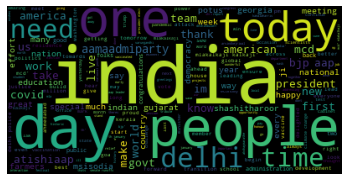

In [ ]:
words = tweet_df['cleaned_tweets'].values 

wordcloud = WordCloud().generate(str(words))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()